# Practice Assignment: Understanding Distributions Throgh Sampling 

#### This assignment is optional, and i encourage you to share your solutions with me and your peers in the discussion forums!

To complete this assignment, create a code cell that:

* Creates a number of subplots using the pyplot subplots or matplotlib  gridspec
* Creates an animation, pulling  between 100 and 1000 samples from each of the random  variables (x1,x2,x3,x4) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parametrization of the distributions behind the sampling animations.

Tips: 

* Before you start, think about the different ways you can create this visualization to be as interesting and effective as posible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning  with respect to one another. This is just a guide, so be creative in how younlay things out!
* Try to keep the length of your animations reasonable(roughly between 10 and 30 seconds)

<IPython.core.display.Javascript object>


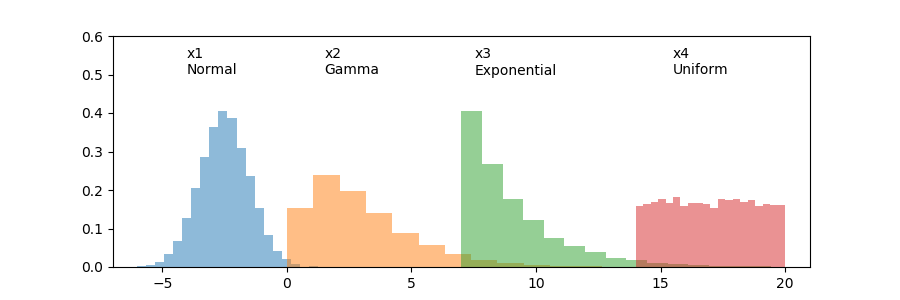

/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(15.49297817499906, 0.5, 'x4\nUniform')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform dsitributions

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2,1.5,10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20,10000)

#plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins =20, alpha=0.5)
plt.hist(x2, normed=True, bins =20, alpha=0.5)
plt.hist(x3, normed=True, bins =20, alpha=0.5)
plt.hist(x4, normed=True, bins =20, alpha=0.5)
plt.axis([-7, 21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform') 

<IPython.core.display.Javascript object>


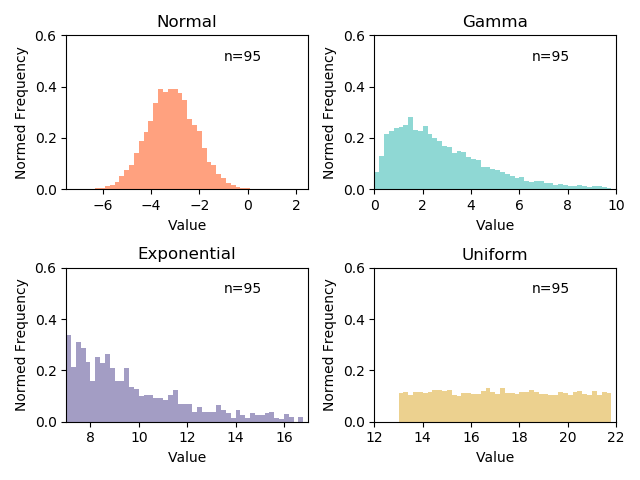

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider

fig, ((ur,ul), (lr,ll)) = plt.subplots(2,2)
hists = [ur, ul, lr, ll]

h1 = np.random.normal(-3.141592, 1, 10000)
h2 = np.random.gamma(1.8, 1.6, 10000)
h3 = np.random.exponential(3.141592, 10000)
h4 = np.random.uniform(13, 22, 10000)



h = [h1, h2, h3, h4]

axis1 = [-7.5, 2.5, 0, 0.6]
axis2 = [0, 10, 0, 0.6]
axis3 = [7, 17, 0, 0.6]
axis4 = [12, 22, 0, 0.6]
axis = [axis1, axis2, axis3, axis4]

titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']

bins1 = np.arange(-7.5, 2.5, 0.2)
bins2 = np.arange(0, 10, 0.2)
bins3 = np.arange(7, 17, 0.2)
bins4 = np.arange(12, 22, 0.2)
bins = [bins1, bins2, bins3, bins4]

color1 = 'orangered'
color2 = 'lightseagreen'
color3 = 'darkslateblue'
color4 = 'goldenrod'
colors = [color1, color2, color3, color4]

anno_x = [-1, 6.5, 13.5, 18.5]

def animation_m(curr):
    if curr == 100:
        a.event_source.stop()
    
    for i in range(len(hists)):
        hists[i].cla()
        hists[i].hist(h[i][:180*curr], normed = True, bins = bins[i], alpha = 0.5, color = colors[i])
        hists[i].axis(axis[i])
        hists[i].set_title(titles[i])
        hists[i].set_ylabel('Normed Frequency')
        hists[i].set_xlabel('Value')
        hists[i].annotate('n={}'.format(curr), [anno_x[i], 0.5])
    plt.tight_layout()
a = animation.FuncAnimation(fig, animation_m, interval = 100)